<a href="https://colab.research.google.com/github/Aayush360/data_science/blob/master/Bayes_Classifier_training_test_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip SpamData.zip

## Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Constants

In [0]:
TOKEN_HAM_PROB_FILE ='/content/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_SPAM_PROB_FILE ='/content/SpamData/03_Testing/prob-spam.txt'
TOKEN_ALL_PROB_FILE = '/content/SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = '/content/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE ='/content/SpamData/03_Testing/test-target.txt'



VOCAB_SIZE = 2500

## Load the Data

In [0]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token Probabilities

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')





## Calculating the Joint Probability

### The dot Product

In [5]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a=',a)
print('b= ',b)

a= [1 2 3]
b=  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
prob_token_spam.reshape(2500,1)

array([[9.03796855e-03],
       [4.88484286e-03],
       [6.82767808e-03],
       ...,
       [1.00926505e-04],
       [1.66528734e-04],
       [3.02779516e-05]])

In [8]:
X_test.shape

(1723, 2500)

In [9]:
# dot product between prob_token_spam and X_test

print('shape of the dot product is: ',X_test.dot(prob_token_spam).shape)

shape of the dot product is:  (1723,)


## Set the prior

$$ P(Spam \, | \, X\,) = \frac {P(X \,| \, Spam\,) \, P(Spam)}{P(X)} $$

In [0]:
PROB_SPAM = 0.3116

In [11]:
np.log(prob_token_spam)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

## Joint probability in Joint Format

In [0]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_token_all))+np.log(PROB_SPAM)

In [13]:
joint_log_spam

array([  3.21643926,  13.38035269,  19.20668974, ..., -31.37387449,
        -4.78934991, -17.03515493])

In [0]:
# log probability that the email is non_spam

joint_log_ham = X_test.dot(np.log(prob_token_ham)-np.log(prob_token_all))+np.log(1-PROB_SPAM)

In [15]:
joint_log_spam[1]

13.380352685652417

## Making Predictions

### Checking for higher joint probability

$$ P ( Spam \, | \, X) > P( Ham \, | \, X)$$

 **OR** 
<br>
$$ P ( Spam \, | \, X) < P( Ham \, | \, X) $$

In [0]:
prediction = joint_log_spam> joint_log_ham

In [17]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [18]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify
$$ P(Spam \, | \, X\,) \not = {P(X \,| \, Spam\,) \, P(Spam)} $$


In [0]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)+np.log(1-PROB_SPAM))
joint_log_spam = X_test.dot(np.log(prob_token_spam)+np.log(PROB_SPAM))

In [0]:
#prediction = joint_log_spam> joint_log_ham

In [0]:
#prediction[-5:]

##Metrics and Evaluation

### Accuracy

In [22]:
correct_doc = (y_test == prediction).sum()

print('Docs classified correctly', correct_doc)

Docs classified correctly 1671


In [23]:
num_docs_wrong = X_test.shape[0] - correct_doc
print('Docs Classified Incorrectly ', num_docs_wrong)

Docs Classified Incorrectly  52


In [24]:
#Accuracy

correct_doc /(len(X_test))

0.9698200812536274

In [25]:
frac_wrong = num_docs_wrong/(len(X_test))
print('fraction classified incorrecly is:  {:.2%}  '.format(frac_wrong))
print('Accuracy of the model is :   {:.2%}  '.format(1-frac_wrong))

fraction classified incorrecly is:  3.02%  
Accuracy of the model is :   96.98%  


### Visualizing the Results

In [0]:
#Chart Styling info

yaxis_label ='P(X|Spam)'
xaxis_label ='P(X|Non-spam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

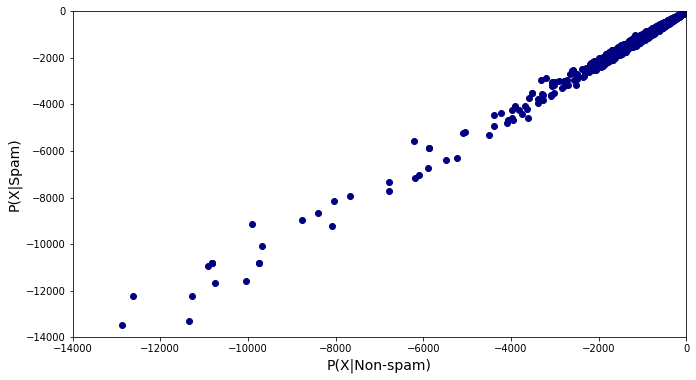

In [27]:
plt.figure(figsize=(11,6))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

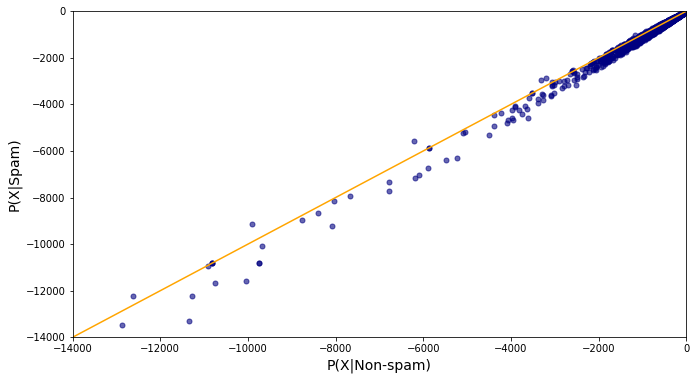

In [28]:
plt.figure(figsize=(11,6))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy',alpha =0.6, s=25)
plt.plot(linedata,linedata, color='orange')
plt.show()

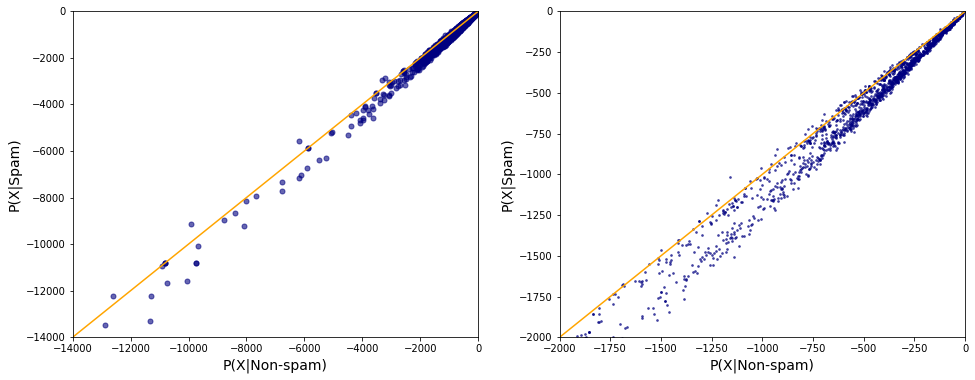

In [29]:
plt.figure(figsize=(16,6))
#Chart no. 1

plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy',alpha=0.6, s=25)
plt.plot(linedata,linedata, color='orange')


# Chart no. 2
linedata = np.linspace(start=-2000, stop=1, num=1000)
plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.6, s=3)
plt.plot(linedata,linedata, color='orange')



plt.show()

In [0]:
#Chart Styling
sns.set_style('whitegrid')
labels='Actual Category'

summary_df = pd.DataFrame({yaxis_label:joint_log_spam, xaxis_label:joint_log_ham, labels: y_test})


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


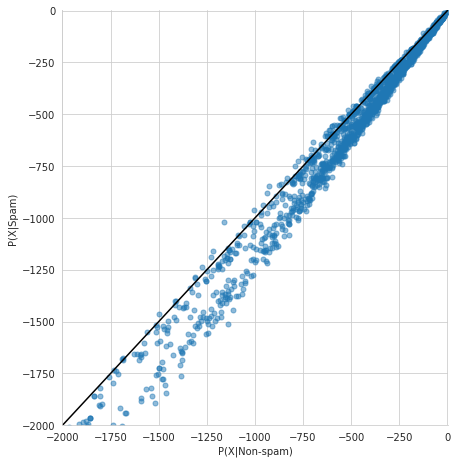

In [31]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, scatter_kws={'alpha':0.5,'s':25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata, color='black')


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


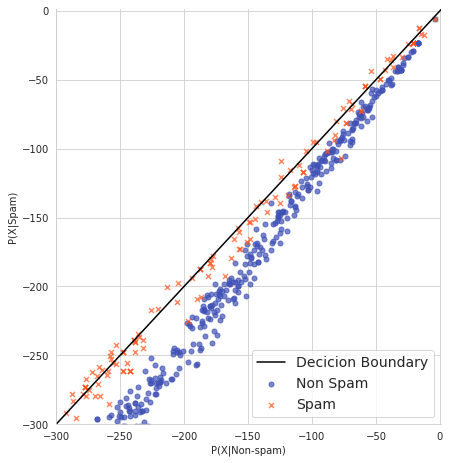

In [32]:
my_colors =['#3F51B5','#FF5722']
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, scatter_kws={'alpha':0.7,'s':25}
           ,hue=labels, markers=['o','x'], palette=my_colors, legend=False)
plt.xlim([-300,1])
plt.ylim([-300,1])
plt.plot(linedata,linedata, color='black')
plt.legend(('Decicion Boundary','Non Spam','Spam'),loc='lower right', fontsize=14)



## False Positive and False Negative

In [34]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1163,  560]))

In [0]:
true_pos = (y_test==1)&(prediction==1)
true_pos=true_pos.sum()

In [0]:
# for true negatives, and & represent the bitwise and i.e element by element comparision

true_neg = (y_test==0)& (prediction==0)
true_neg=true_neg.sum()

In [0]:
# numpy array for false positive, something not true but has been predicted as true

false_pos = (y_test==0) & (prediction==1)
false_pos=false_pos.sum()

In [0]:
false_neg = (y_test==1) &(prediction==0)
false_neg=false_neg.sum()

## Recall Score

In [52]:
recall_score = true_pos/(true_pos+ false_neg)
print('the recall score is {:.2%} '.format(recall_score))

the recall score is 93.20% 


##Precision Score

In [56]:
precision_score = true_pos / (true_pos+false_pos)
print('the precision score is {:.3}'.format(precision_score))

the precision score is 0.979


## F-Score or F1-Score

In [62]:
f1_score = 2*precision_score*recall_score/(precision_score+recall_score)
print('the f-score for the model is {:.3}'.format(f1_score))

the f-score for the model is 0.955
